In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Удаление дубликатов в данных

In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [ ]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [ ]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [ ]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [ ]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [ ]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna()

,0,1,2,3


In [ ]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [ ]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.554254,NaN,NaN
1,2.044001,NaN,NaN
2,-0.406626,NaN,0.328056
3,1.049602,NaN,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna(0)

,0,1,2
0,-0.554254,0.000000,0.000000
1,2.044001,0.000000,0.000000
2,-0.406626,0.000000,0.328056
3,1.049602,0.000000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.554254,0.500000,0.000000
1,2.044001,0.500000,0.000000
2,-0.406626,0.500000,0.328056
3,1.049602,0.500000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna(method="bfill")

,0,1,2
0,-0.554254,-0.260140,0.328056
1,2.044001,-0.260140,0.328056
2,-0.406626,-0.260140,0.328056
3,1.049602,-0.260140,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.554254,NaN,0.328056
1,2.044001,NaN,0.328056
2,-0.406626,-0.260140,0.328056
3,1.049602,-0.260140,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna(data.mean())

,0,1,2
0,-0.554254,6.500000,3.000000
1,2.044001,6.500000,3.000000
2,-0.406626,6.500000,0.328056
3,1.049602,6.500000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


In [ ]:
df.fillna(data.median())

,0,1,2
0,-0.554254,6.500000,3.000000
1,2.044001,6.500000,3.000000
2,-0.406626,6.500000,0.328056
3,1.049602,6.500000,0.622102
4,1.905355,-0.260140,0.442188
5,-1.217356,-0.355152,0.162520
6,0.744739,0.532442,0.946928


Медиана более устойчива к выбросам

In [ ]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<AxesSubplot:>

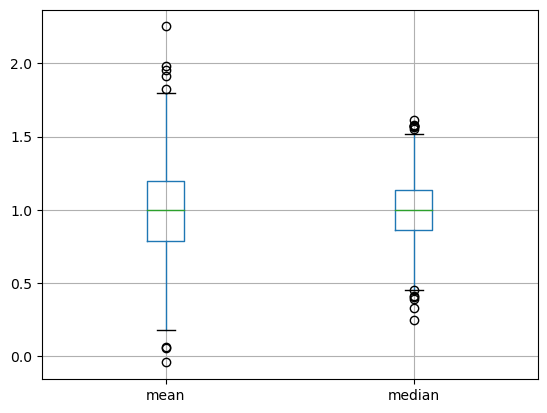

In [ ]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [ ]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.554254,NaN,NaN,1
1,2.044001,NaN,NaN,1
2,-0.406626,NaN,0.328056,0
3,1.049602,NaN,0.622102,0
4,1.905355,-0.260140,0.442188,0
5,-1.217356,-0.355152,0.162520,0
6,0.744739,0.532442,0.946928,0


Замена значений

In [ ]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [ ]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [ ]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [ ]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [ ]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

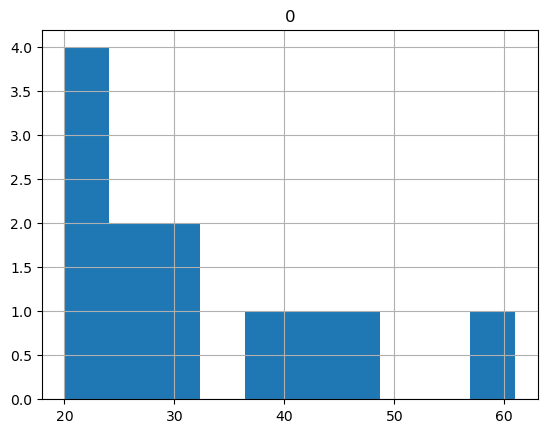

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [ ]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

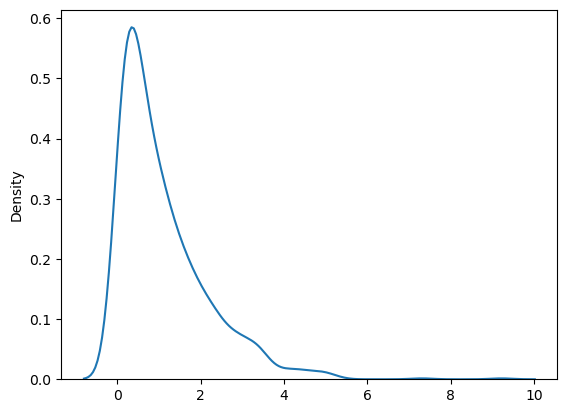

In [ ]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

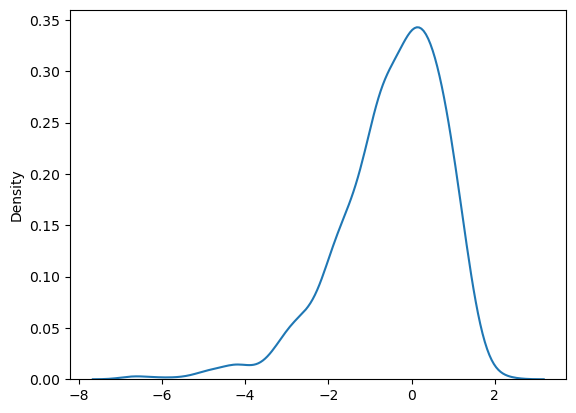

In [ ]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

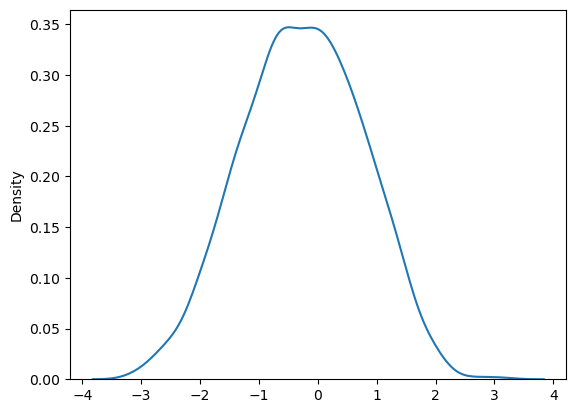

In [ ]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [ ]:
best_lambda

0.2762186885938159

# Домашнее задание

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [ ]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

Посмотрим матрицу корреляций

In [ ]:
matrix = df.corr()
matrix

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
index,1.000000,0.003898,-0.001457,-0.005556,-0.000464,-0.000202,-0.002258,-0.001537,0.001591,-0.000337,...,0.004611,-0.004249,0.000466,-0.001526,0.000074,-0.006934,0.006834,0.005661,-0.001654,0.002701
back-suspension,0.003898,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,...,-0.102584,-0.031057,-0.042323,-0.323143,-0.021228,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
battery-capacity,-0.001457,0.008851,1.000000,-0.031922,-0.057803,-0.043129,0.158632,-0.145231,0.065207,0.056365,...,0.022147,-0.008994,0.006409,-0.071311,-0.102719,0.020826,0.002595,-0.001942,0.024069,0.025703
charge-time,-0.005556,-0.193989,-0.031922,1.000000,0.018219,0.046768,0.107905,0.121424,-0.007057,0.089422,...,0.080451,-0.012119,-0.023785,0.089222,-0.032347,0.207838,-0.027029,-0.048904,-0.030769,0.110034
compression,-0.000464,-0.105450,-0.057803,0.018219,1.000000,0.130448,-0.084557,-0.033044,0.167183,0.252255,...,0.195110,-0.111495,0.054701,0.266837,0.005798,-0.070765,0.000219,0.006494,-0.003346,0.023138
consumption-mixed,-0.000202,-0.137078,-0.043129,0.046768,0.130448,1.000000,0.079701,0.125600,-0.004348,0.316506,...,0.265524,-0.080412,0.022038,0.307298,-0.064671,-0.113843,-0.033141,0.024245,-0.014838,0.118195
cylinders-order,-0.002258,-0.119261,0.158632,0.107905,-0.084557,0.079701,1.000000,0.720077,-0.074468,-0.052457,...,0.033961,0.102481,-0.014392,0.224373,0.008260,0.232579,-0.023909,-0.011807,0.000143,0.376272
cylinders-value,-0.001537,-0.160858,-0.145231,0.121424,-0.033044,0.125600,0.720077,1.000000,-0.101289,-0.161831,...,0.033480,0.125640,-0.028327,0.302997,0.085953,0.217498,-0.044688,-0.014459,-0.017780,0.472177
engine-feeding,0.001591,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,...,0.127065,-0.057243,0.076379,0.042067,0.031153,-0.110842,0.012638,0.026376,-0.026445,0.012235
engine-start,-0.000337,-0.029760,0.056365,0.089422,0.252255,0.316506,-0.052457,-0.161831,0.232445,1.000000,...,0.504745,-0.229782,0.065405,0.327209,-0.399186,-0.136376,-0.026436,0.038331,0.028909,0.150944


Отобрали факторы с наибольшей корреляцией

In [ ]:
X = df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]]
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X

,configurations_tank-volume,configurations_seats,weight,cylinders-order,cylinders-value
0,40.0,13,820.0,0,3
1,108.0,13,2350.0,3,7
2,55.0,13,1350.0,0,4
3,55.0,13,1090.0,0,4
4,62.0,13,1410.0,0,4
...,...,...,...,...,...
43240,47.0,13,-1.0,0,4
43241,65.0,13,1545.0,0,4
43242,55.0,13,1210.0,0,4
43243,70.0,13,1660.0,0,5


Посмотрим корреляцию между признаками

<Axes: >

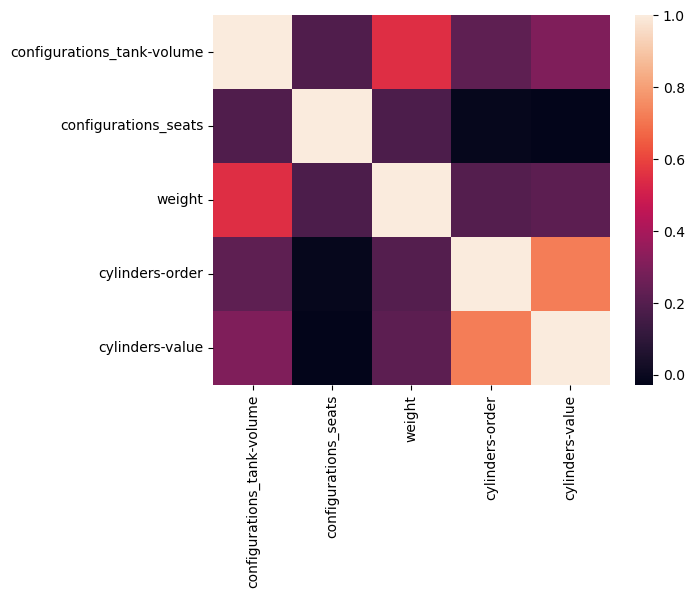

In [ ]:
corr_matrix = df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]].corr()
sns.heatmap(corr_matrix)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(train_X)
X_test_st = scaler.fit_transform(test_X)

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(X_train_st, train_y)

print(model.coef_, model.intercept_)

[[44.08063796 60.00552615 24.94782478 13.66414956 82.40650595]] [2659.80976047]


In [ ]:
predictions = model.predict(X_test_st)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, predictions)

0.3876247852692677

А что если применить (сделать) регуляризацию (Ridge-регрессия)?

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy.stats import linregress

# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(X_train_st, train_y)

print(model.coef_, model.intercept_)

# делаем прогнозы
predictions = model.predict(X_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, predictions)

[[44.08018768 60.00339086 24.94806777 13.66736139 82.4013775 ]] [2659.80976047]


0.38762410981353423

## Baseline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [ ]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
reg.score(train_X, train_y)

0.37585592851513494

In [ ]:
mean_squared_error(reg.predict(train_X), train_y)

34207.394447656836

In [ ]:
scores = cross_validate(reg, train_X, train_y, cv=3,
                        scoring=('neg_mean_squared_error'))

In [ ]:
scores

{'fit_time': array([0.01100254, 0.01000237, 0.00800085]),
 'score_time': array([0.00500083, 0.00500083, 0.00500154]),
 'test_score': array([-34269.01650767, -33815.5633974 , -34551.60543924])}

In [ ]:
mean_squared_error(reg.predict(test_X), test_y)

35469.85292838743

Другие способы

### Домашнее задание

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [ ]:
#посмотрим матрицу корреляций
matrix = df.corr()['target']
matrix

index                             0.002701
back-suspension                  -0.159912
battery-capacity                  0.025703
charge-time                       0.110034
compression                       0.023138
consumption-mixed                 0.118195
cylinders-order                   0.376272
cylinders-value                   0.472177
engine-feeding                    0.012235
engine-start                      0.150944
engine-stop                      -0.137719
engine-type                      -0.125304
gear-type                         0.068319
luxury                            0.085707
max-speed                         0.111922
power-electro-kw                  0.028609
supply-system                     0.045416
valves                           -0.066402
valvetrain                        0.021120
weight                            0.339835
configurations_auto-premiere      0.106856
configurations_back-wheel-base    0.051349
configurations_front-brake        0.184791
configurati

<Axes: >

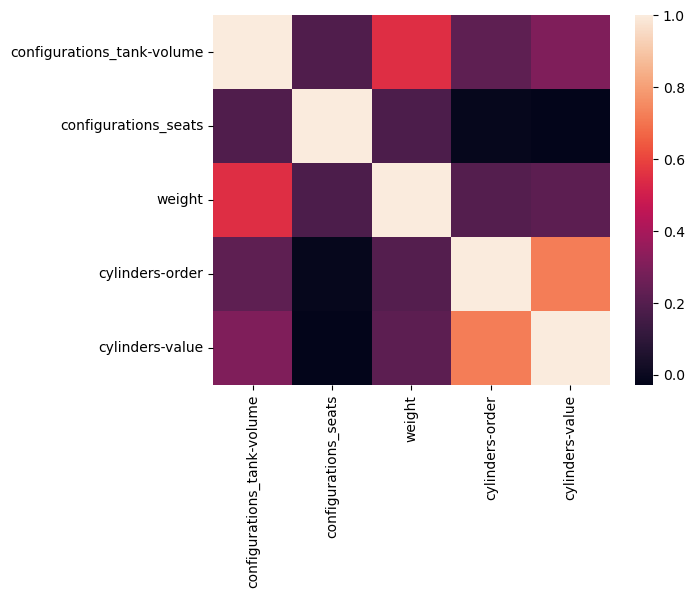

In [ ]:
#проверим данные на мультиколлинеарность
corr_matrix = df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]].corr()
sns.heatmap(corr_matrix)

In [ ]:
print(df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]].corr())

                            configurations_tank-volume  configurations_seats  \
configurations_tank-volume                    1.000000              0.185502   
configurations_seats                          0.185502              1.000000   
weight                                        0.546153              0.180505   
cylinders-order                               0.224373             -0.014392   
cylinders-value                               0.302997             -0.028327   

                              weight  cylinders-order  cylinders-value  
configurations_tank-volume  0.546153         0.224373         0.302997  
configurations_seats        0.180505        -0.014392        -0.028327  
weight                      1.000000         0.199547         0.220476  
cylinders-order             0.199547         1.000000         0.720077  
cylinders-value             0.220476         0.720077         1.000000  


Наблюдается тесная связь между признаками cylinders-value и cylinders-order; так как между cylinder_value и target корреляция выше, оставляем этот фактор

In [ ]:
df1 = df[['target', 'configurations_tank-volume', 'configurations_seats', 'weight', 'cylinders-value']]
df1

,target,configurations_tank-volume,configurations_seats,weight,cylinders-value
0,2360,40.0,13,820.0,3
1,3060,108.0,13,2350.0,7
2,2648,55.0,13,1350.0,4
3,2513,55.0,13,1090.0,4
4,2703,62.0,13,1410.0,4
...,...,...,...,...,...
43240,2510,47.0,13,-1.0,4
43241,2808,65.0,13,1545.0,4
43242,2520,55.0,13,1210.0,4
43243,2755,70.0,13,1660.0,5


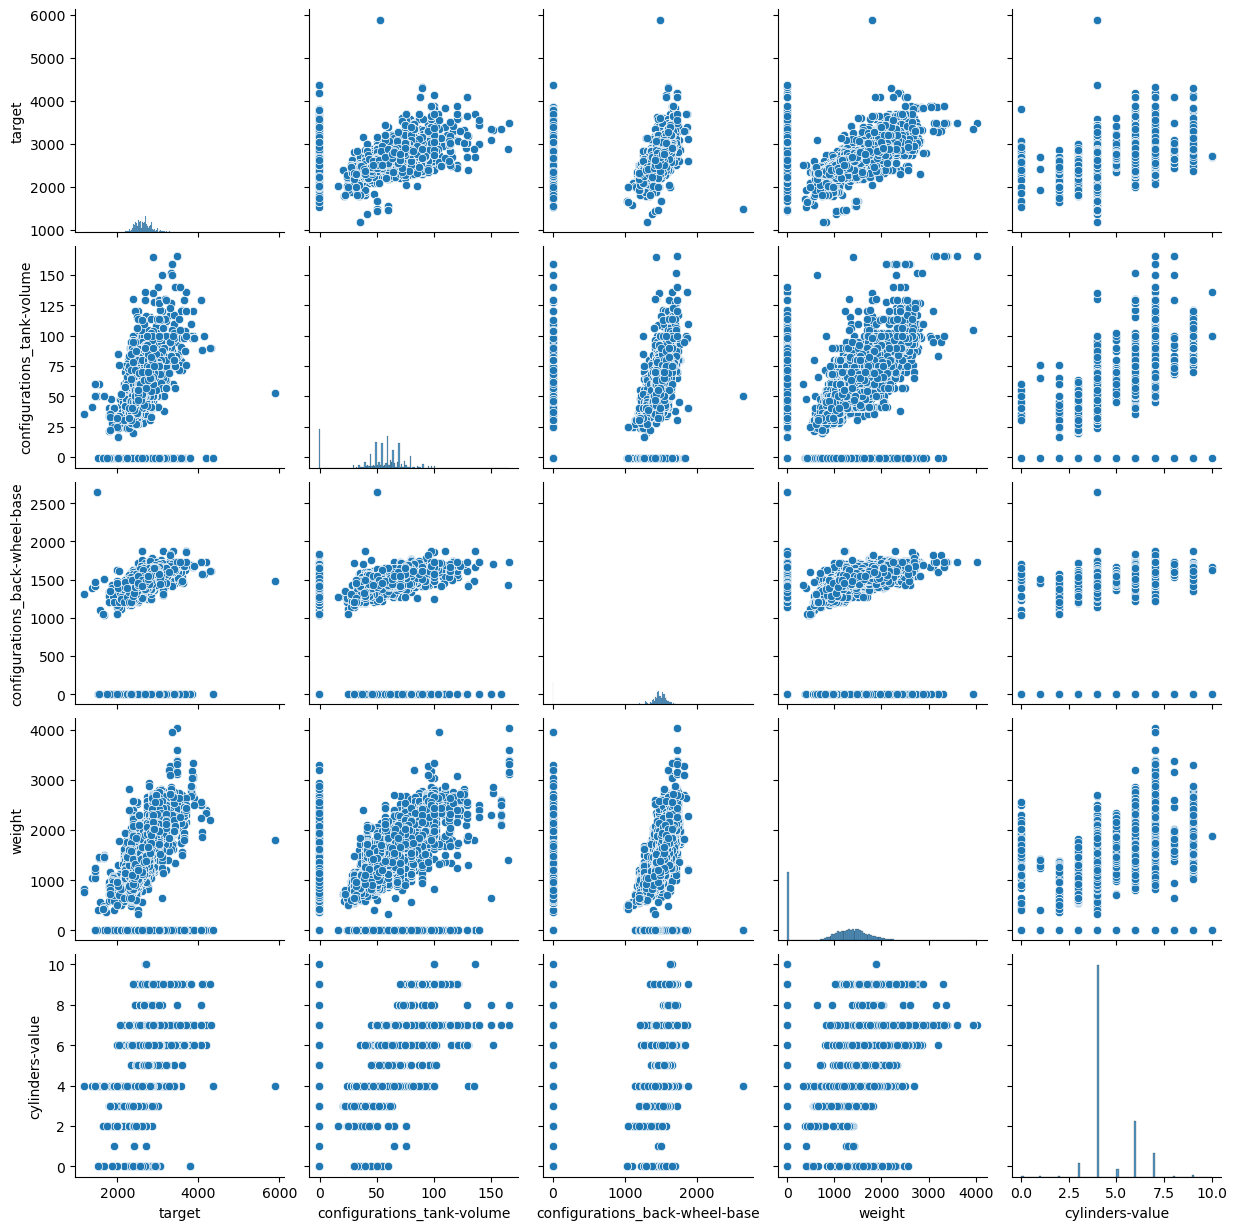

In [ ]:
sns.pairplot(df1)

In [ ]:
#отберем факторы с наибольшим коэффициентом корреляции
X = df1[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-value"]]
y = df1[["target"]]

In [ ]:
#разбили данные на тестовую и обучающую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#стандартизируем выборки, причем уже после их разделения,
#чтобы данные из train и test не просочились друг в друга
scaler = StandardScaler()
X_train_st = scaler.fit_transform(train_X)
X_test_st = scaler.fit_transform(test_X)

In [ ]:
#по методу в baseline

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
reg.score(train_X, train_y)

0.3742032391545771

In [ ]:
mean_squared_error(reg.predict(train_X), train_y)

34297.97320893795

In [ ]:
scores = cross_validate(reg, train_X, train_y, cv=3,
                        scoring=('neg_mean_squared_error'))

In [ ]:
scores

{'fit_time': array([0.00989246, 0.0100019 , 0.00800157]),
 'score_time': array([0.00500154, 0.00500131, 0.00500011]),
 'test_score': array([-34372.14263406, -33916.50434762, -34616.20629804])}

In [ ]:
mean_squared_error(reg.predict(test_X), test_y)

35591.727150846826

In [ ]:
r2_score(test_y, reg.predict(test_X))

0.38574103561971906

In [ ]:
#как пробовали раньше

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(X_train_st, train_y)

print(model.coef_, model.intercept_)

[[43.77429161 59.9772648  25.76818694 92.09532322]] [2659.80976047]


In [ ]:
predictions = model.predict(X_test_st)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, predictions)

0.38553560298359635

In [ ]:
mean_squared_error(test_y, predictions)

35603.63044043111

In [ ]:
#попробуем с Rigde регрессией, но не удаляя изначально факторы из таблицы

In [ ]:
X1 = df.drop(["target"], axis=1)
y1 = df[["target"]]
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [ ]:
X_train_st1 = scaler.fit_transform(train_X1)
X_test_st1 = scaler.fit_transform(test_X1)

from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import linregress

# создадим модель линейной регрессии
model_Ridge = Ridge()

# обучим нашу модель
model_Ridge.fit(X_train_st1, train_y1)

print(model_Ridge.coef_, model_Ridge.intercept_)

# делаем прогнозы
predictions = model_Ridge.predict(X_test_st1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y1, predictions)

[[ 1.70992031e+00 -1.87979716e-02  1.71023513e+01  2.83050804e+01
  -2.25023652e+01 -4.10985732e+00 -1.66373271e+00  1.00882328e+02
  -1.40247408e+01  3.71899390e+01 -7.32859285e+00 -3.89253821e+01
   2.49890777e+01  7.04044967e+00 -2.00086895e+01  4.51577051e+00
   6.38852830e-01  7.99333685e+00  2.42325922e+00  2.21373905e+01
  -3.01575035e+01 -1.76304093e+01  9.58994343e+00 -4.69855318e+00
   5.19164393e+01  5.29662698e+01 -9.03424100e+00  1.35249524e+01
  -6.08719883e-02  8.67759069e+00 -1.78844784e+00]] [2659.80976047]


0.4645490349802138

In [ ]:
mean_squared_error(test_y1, predictions)

31025.39117010508

In [ ]:
#метод 4

In [ ]:
#отберем факторы с наибольшим коэффициентом корреляции
X = df1[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-value"]]
y = df1[["target"]]

In [ ]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
#стандартизируем выборки, причем уже после их разделения,
#чтобы данные из train и test не просочились друг в друга
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X_st, y)

print(LinReg.score(X_st, y))
print(mean_squared_error(reg.predict(X_st), y))

0.3783020767526146
496012.3651794474


C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('intercept', LinReg.intercept_)
print('slope', LinReg.coef_)


intercept [2660.82624581]
slope [[44.79628961 60.58512608 24.09007883 94.41315769]]


In [ ]:
#метод 5

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dtree = DecisionTreeRegressor(random_state=101)

In [ ]:
dtree.fit(X_train_st,train_y)

DecisionTreeRegressor(random_state=101)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
prediction = dtree.predict(X_test_st)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(test_y, prediction)))
print('R2 Score : ', r2_score(test_y, prediction))

RMSE :  168.4611040280236
R2 Score :  0.5102192353398629


In [ ]:
#метод 6

In [ ]:
clf_rf = RandomForestRegressor()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train_st, train_y)

C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Elizaveta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
predictions = best_clf.predict(X_test_st)
best_clf.score(X_test_st, test_y)

0.6715294427899285

In [ ]:
mse = mean_squared_error(test_y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(test_y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 19032.41975654721
R-squared: 0.6715294427899285
